# Name: Sunil Pradhan

## Project: 4

## Project Name: Retail Analysis with Walmart Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In [2]:
#importing and reading the dataset
dt=pd.read_csv("Walmart_Store_sales.csv")
dt

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#changing the datatype of Date column
dt['Date']=pd.to_datetime(dt['Date'])

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
#checking for missing values if any
dt.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There is no missing value present in the data set

In [7]:
#splitting the date column and creating three new column as Day, Month and Year
dt['Day']=pd.DatetimeIndex(dt['Date']).day
dt["Month"]=pd.DatetimeIndex(dt['Date']).month
dt['Year']=pd.DatetimeIndex(dt['Date']).year
dt

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [8]:
#finding maximum and minimum sales
total_sales=dt.groupby('Store', as_index=False)['Weekly_Sales'].sum()
total_sales=total_sales.set_index(total_sales['Store'])
total_sales

,Store,Weekly_Sales
Store,,
1,1,2.224028e+08
2,2,2.753824e+08
3,3,5.758674e+07
4,4,2.995440e+08
5,5,4.547569e+07
6,6,2.237561e+08
7,7,8.159828e+07
8,8,1.299512e+08
9,9,7.778922e+07


In [9]:
#finding store having maximum sales
max_sale=total_sales[total_sales['Weekly_Sales']==total_sales.max()['Weekly_Sales']]
print("Store", int(max_sale['Store']), "has maximum sales value of ", float(max_sale['Weekly_Sales']),"$")

Store 20 has maximum sales value of  301397792.46 $


In [10]:
#finding store having minimum sales
min_sale=total_sales[total_sales['Weekly_Sales']==total_sales.min()['Weekly_Sales']]
print("Store", int(min_sale['Store']), "has minimum sales value of ", float(min_sale['Weekly_Sales']),"$")

Store 33 has minimum sales value of  37160221.96 $


In [11]:
#finding the store having maximum standard deviation
std_sales=pd.DataFrame(dt.groupby('Store', as_index=False)['Weekly_Sales'].std()).rename(columns={'Weekly_Sales':'Std'})
std_sales=std_sales.set_index(std_sales['Store'])
std_sales

,Store,Std
Store,,
1,1,155980.767761
2,2,237683.694682
3,3,46319.631557
4,4,266201.442297
5,5,37737.965745
6,6,212525.855862
7,7,112585.469220
8,8,106280.829881
9,9,69028.666585


In [12]:
#store having maximum standard deviation
max_std=std_sales[std_sales['Std']==std_sales.max()['Std']]
print("The Store", int(max_std['Store']), "has maximum standard deviation with ", float(max_std['Std']),"$")

The Store 14 has maximum standard deviation with  317569.9494755081 $


C:\Users\sssun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Sales Distribution of Store #14')

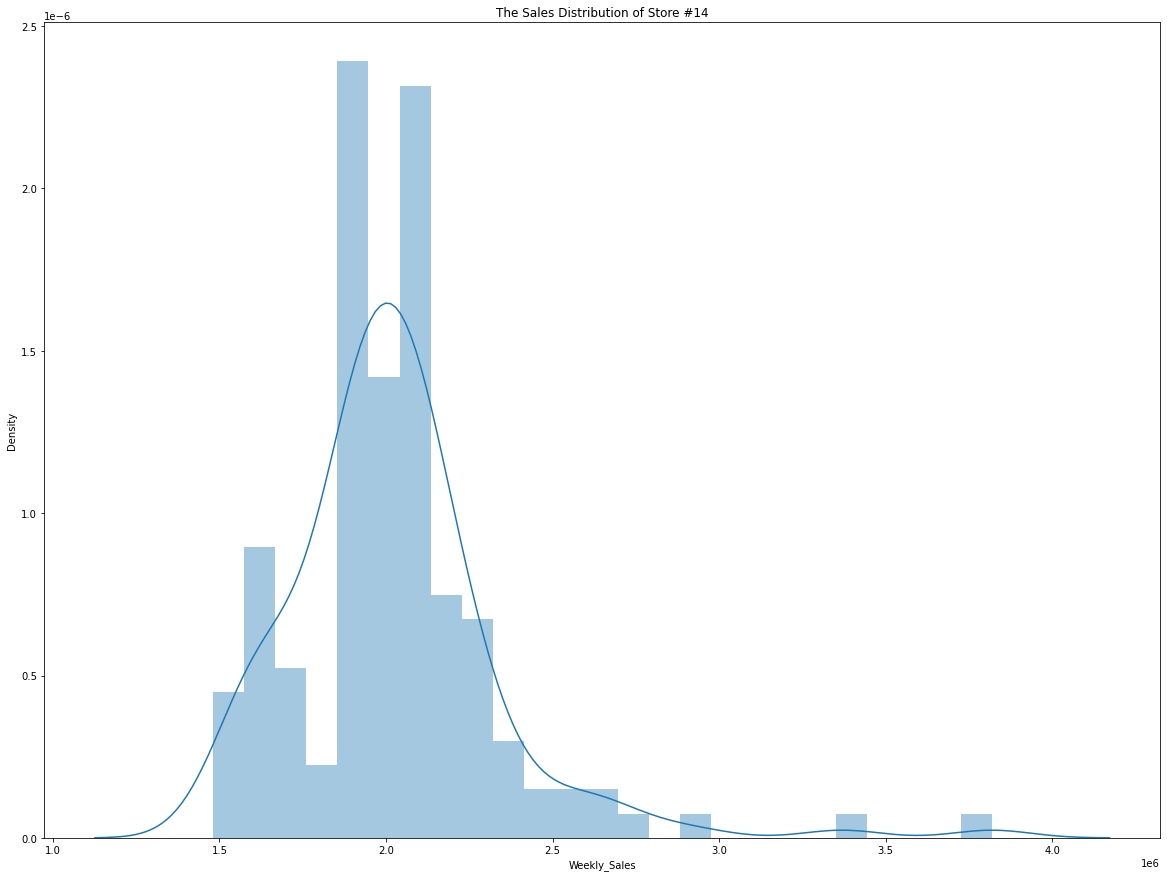

In [13]:
#distribution of store having maximum standard deviation
plt.figure(figsize=(20,15))
sns.distplot(dt[dt['Store']==int(max_std['Store'])]['Weekly_Sales'])
plt.title("The Sales Distribution of Store #" + str(int(max_std['Store'])))

In [14]:
#finding coefficient of mean to standard deviation
coef_mean_std=pd.DataFrame(dt.groupby('Store')['Weekly_Sales'].std()/dt.groupby('Store')['Weekly_Sales'].mean()).rename(columns={'Weekly_Sales':'Coef_Mean'}).sort_values('Coef_Mean')
coef_mean_std

,Coef_Mean
Store,
37,0.042084
30,0.052008
43,0.064104
44,0.081793
31,0.090161
42,0.090335
33,0.092868
1,0.100292
34,0.108225


In [15]:
#store having maximum coefficient of mean to standard deviation
print("The Store", coef_mean_std.tail(1).index[0], "has maximum coefficient of mean to standard deviation of ", float(coef_mean_std.tail(1)['Coef_Mean']))

The Store 35 has maximum coefficient of mean to standard deviation of  0.2296811138997643


C:\Users\sssun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Sales Distribution of Store #35')

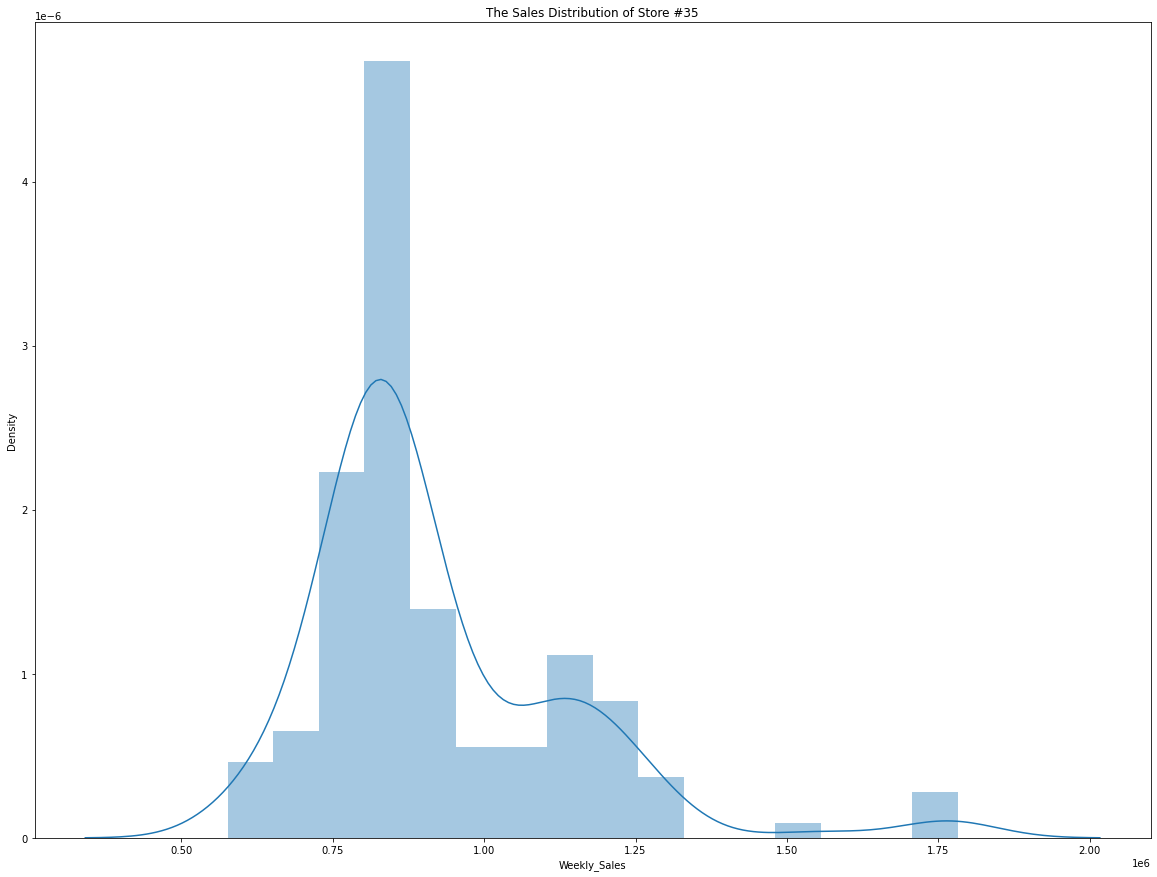

In [16]:
#distribution of store having maximum coefficient to standard deviation
plt.figure(figsize=(20,15))
sns.distplot(dt[dt['Store']==coef_mean_std.tail(1).index[0]]['Weekly_Sales'])
plt.title("The Sales Distribution of Store #" + str(coef_mean_std.tail(1).index[0]))